<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Introduction to Computation for the Social Sciences</h1>
<h2 style="margin-top: 0.7em; margin-bottom: 0.3em;">Assignment 3</h2>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline: 22.12.2024 12:00 pm</h3>

</div>
<br>

<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">
Please push your solutions to your personal repository in our <a href='https://classroom.github.com/a/tGD_7t85'>GitHub Classroom</a></h4><br>

***

This assignment will test your knowledge in object oriented programming (OOP), your understanding of regular expressions (regexes), and finally we will have you perform sentiment analysis.<br>
As always: In case of questions feel free to reach out to us tutors in person, via mail, or over discord.<br>
***Important: Submit a solution for every single task and do not skip any of them. Even if your solution is not perfect or doesn't work you might still receive some points that way!***


***

In [1]:
# Import the modules you use throughout the assignment here (this is called a setup chunk/cell)
# e.g import pandas as pd
# e.g import numpy as np and so on...

import pandas as pd
import numpy as np
import requests
import re
import json
import zipfile
import tkinter as tk
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

# Part 1 - Object Oriented Programming

## Task 1.1


The [Dog API](https://dogapi.dog/docs/api-v2) is a simple and easy to use tool to get information about certain dog breeds along with random facts about dogs.<br>
Use the API to create a class `DogBreed`.
- This class takes as input the name of a dog breed (e.g. 'Caucasian Shepherd Dog' or 'Bouvier des Flandres')
- Implement a class method `get_breed_info()`that returns a description of input dog breed
- Implement a class method `get_max_age()`that returns the maximum life expectancy of the input dog breed
- Implement a class method `get_fact()`that returns a random fact about dogs

In [2]:
# Your code
## Specifying the DogBreed with the required attributes and methods. 
class DogBreed:
    """
    Class DogBreed: 
        A Class that retrieves information from the DogAPI and, if called, returns information or max age of a certain breed or a random fact about dogs.
    
    Attributes
    ----------
    name: str
        The name of a dog breed
    breeds: dict
        A dictonary of all dog breeds and their info retrieved from iterating over all pages of the DogAPI
    
    Methods
    -------
    __init__(name):
        Takes the string of the name of a dog breed. Creates the empty dictionary breeds that is filled by iterating over retrieved data from the API for each dog.
        The data itself is retrieved from each page by iterating over all pages (29) of the API.
    get_breed_info():
        Retrieves and returns info stored in the breeds dictonary for the dog breed specified by the name attribute.
    get_max_age():
        Retrieves and returns the maximum age stored in the breeds dictonary for the dog breed specified by the name attribute.
    get_fact():
        Retrieves and returns a random fact from the DogAPI, independent of the dog breed specified in the name argument.
    """
    
    def __init__(self, name):
        self.name = name
        self.breeds={}
        for page in range(1,30):
            dog_page=requests.get(f"https://dogapi.dog/api/v2/breeds?page[number]={page}").json()
            for breed in dog_page["data"]:
                self.breeds[breed["attributes"]["name"]]=breed

    def get_breed_info(self):
        print(self.breeds[self.name]["attributes"]["description"])

    def get_max_age(self):
        print(f"The maximum life expectancy of the dog breed {self.name} is {self.breeds[self.name]["attributes"]["life"]["max"]} years.")
    
    def get_fact(self):
        print(f"Here is a random fact about dogs:\n{requests.get("https://dogapi.dog/api/v2/facts?limit=1").json()["data"][0]["attributes"]["body"]}")
    

## Task 1.2 - Bonus


The class `DogBreed` you created in task 1.1 is probably pretty simple. To remedy this, please implement a system that catches exceptions and deals with them appropriately. For this you will have to think about the types of exceptions someone using the `DogBreed` class might encounter and how you want to deal with each of them.<br>
Feel free to do additional on how to handle exceptions as we did not cover them in much detail. You can get a nice overview, for example, [here](https://www.w3schools.com/python/python_try_except.asp).<br>
Please copy paste your code from above and implement exception handling below. Of course you can also just rewrite the class ;)

***Tip:***
Error handling is usually done something like this in python:<br>
```
try:
    some_code
    return some_var
except error1 as e:
    handle specific exception
except error2 as e:
    handle specific exception
except:
    handle general exception
```

Before you start to code, as mentioned above, you will have to think about the different exceptions someone might encounter and how you would deal with them.
E.g.:<br>
Person tries to use method that is not implemented -> print('This method does not exist for class DogBreed')...<br>

In [3]:
# Your code:
## Specifying the DogBreed class with required attributes and methods.
## Additionally, I used try/except error handling for the case that the specified name of a dog is faulty.
## Furthermore, I tried to establish error handling for the case that an unknown method is called. I figured out how to handle the Attribute Error.
## However, I did not figure out how to resolve the resulting TypeError without causing further issues. 
# Thus, I decided to leave the caused AttributeError as I found its description and the interruption fitting for the case an undefined method is called.

class DogBreed:
    """
    Class DogBreed:
        A Class that retrieves information from the DogAPI and, if called, returns information or max age of a certain breed or a random fact about dogs.
    
    Attributes
    ----------
    name: str
        The name of a dog breed
    breeds: dict
        A dictonary of all dog breeds and their info retrieved from iterating over all pages of the DogAPI
    
    Methods
    -------

    __init__(name):
        Takes the string of the name of a dog breed. Creates the empty dictionary breeds that is filled by iterating over retrieved data from the API for each dog.
        The data itself is retrieved from each page by iterating over all pages (29) of the API.
    get_breed_info():
        Retrieves and returns info stored in the breeds dictonary for the dog breed specified by the name attribute.
        Addition: Checks for spelling issues (KeyError) in the name string by calculating jaccard similarity index with the names of all other dog breeds in the breed dictonary.
                  A suggestion of the next closest dog breed is returned which can be accepted/rejected by inputting Y/N. If N is input, another suggestion is made.
                  If Y was selected in the first or second suggestion, name is modified accordingly and information about the respective breed is returned. 
                  If N was selected in both cases or no nominally close dog breed are found, the 'caller' is asked to check for spelling and try again.
    get_max_age():
        Retrieves and returns the maximum age stored in the breeds dictonary for the dog breed specified by the name attribute.
        Addition: See get breed_info().
    get_fact():
        Retrieves and returns a random fact from the DogAPI, independent of the dog breed specified in the name argument.
    jaccard_similarity(x,y):
        A function that constructs the jaccard similarity index for the strings x and y. 
        The length of the intersection of unique letters in each string is dived by the length of the union of unique letters in each string.
    close_dog():
        Creates an empty dictonary called close breeds. 
        I terates over all dog breed names in the breeds dictonary and calulates the jaccard similarity of the input name string and each breed name.
        For each breed (key) the index (value) is stored in the close_breeds dictionary.
        Then, creates a list of dogbreeds that is sorted according to their jaccard index.
        Checks for the first closest dog which is returned if Y is input.
        If N is input, checks for the second closest dog. 
        Returns the most likely dog.
    """
    def __init__(self, name):
        self.name = name
        self.breeds={}
        for page in range(1,30):
            dog_page=requests.get(f"https://dogapi.dog/api/v2/breeds?page[number]={page}").json()
            for breed in dog_page["data"]:
                self.breeds[breed["attributes"]["name"]]=breed

    def jaccard_similarity(self,x,y):
        intersection = set(x)&set(y)
        union = set(x)|set(y)
        return len(intersection)/len(union) if union else 0
    
    def close_dog(self):
        close_breeds={}
        for breed in self.breeds.keys():
            js=self.jaccard_similarity(breed, self.name)
            if js>0.5:
                close_breeds[breed]=js
        close_breeds=sorted(close_breeds.items(), key=lambda x: x[1], reverse=True)
        if len(close_breeds)>=1:
            most_likely_dog=close_breeds[0]
            print(f"Did you mean {most_likely_dog[0]} (Y/N)?")
            answer=input("Y/N")
            if answer =="Y":
                return most_likely_dog
            elif answer=="N":
                if len(close_breeds)>=2:
                    most_likely_dog=close_breeds[1]
                    print(f"Did you mean {most_likely_dog[0]}(Y/N)?")
                    answer=input("Y/N")
                    if answer=="Y":
                        return most_likely_dog

    def get_breed_info(self):
        try:
            print(self.breeds[self.name]["attributes"]["description"])
        except KeyError as e: 
            ml_dog=self.close_dog()
            if ml_dog:
                print(self.breeds[ml_dog[0]]["attributes"]["description"])
            else: print("Could not find your dog breed! Check for spelling and try again.")
            
    def get_max_age(self):
        try:
            print(f"The maximum life expectancy of the dog breed {self.name} is {self.breeds[self.name]["attributes"]["life"]["max"]} years.")
        except KeyError as e:
            ml_dog=self.close_dog()
            if ml_dog:
                print(f"The maximum life expectancy of the dog breed {ml_dog[0]} is {self.breeds[ml_dog[0]]["attributes"]["life"]["max"]} years.")
            else: print("Could not find your dog breed! Check for spelling and try again.")
    
    def get_fact(self):
        print(f"Here is a random fact about dogs:\n{requests.get("https://dogapi.dog/api/v2/facts?limit=1").json()["data"][0]["attributes"]["body"]}")


***
# Part 2 - Preprocessing & Regular Expressions

In the assignemnt folder, you will find a cdc_whistleblower_tweets.zip containing a .json file with tweets from the CDC Whistleblower debate. The file consists of 272660 tweets containing the hashtag #CDCWhistleblower. In case you're interested in the data you can get some additional infos [here](https://www.snopes.com/fact-check/bad-medicine/).<br>

You will need to process this file aka. the tweets in it in order to work with the data in task 3 & task 4.<br>
***Hint: Use a sample of tweets in order to test your preprocessing steps before you run them on the whole data set (eg. 1000 tweets)***

## Task 2.1

In task 4 you will have to perform sentiment analysis on these tweets. Keeping that in mind please perform the following preprocessing operations on the data. <br>
First, we will replace user mentions, extract hashtags and remove urls from the original text column 
To do so, you will need to use regular expressions.

Create three functions:
- `replace_mentions()`: a function that replaces all user mentions (@username) in the text column with '@user' (think of it as anonymizing the data). You are supposed to change the original text column here!
- `extract_hastags()`: a function that extracts all hashtags (e.g. #CDCWhistleblower) appearing in the tweet and stores them in a new column `hashtags` without altering the original text column
- `remove_urls()`: a function that extracts all domain names from the 'expanded_url' field (entities → urls → expanded_url) to a new column (e.g. [google.com, wikipedia.org, ...]) and removes the URLs from the original text colmn.<br>



Before you get into coding take a moment and think about how you might use regular expressions to solve this task. 
Develop a regular expression for each of the three functions and shortly explain how it works - for example in the comments.




For this task, you might want to consider the [re module](https://docs.python.org/3/library/re.html).<br>


In [4]:
# Your code
## Extracting the files from the zip-folder
with zipfile.ZipFile("cdc_whistleblower_tweets.zip", 'r') as zipf:
    zipf.extractall()

## Loading the json-datafile into python
with open("cdc_whistleblower_tweets.json", "r") as read_file:
    cdc= json.load(read_file)

## Removing the json-file from the submissions-folder
os.remove("cdc_whistleblower_tweets.json")

## Creating a sub-dataset of 500 tweets
cdc_sub=cdc[0:500]


In [5]:
# Your code

def replace_mentions(tweets):
    """
    A function that takes a list of tweet-dictionaries and anonymizes the usernames in each tweet's text

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Iterates over all tweets in the list.
    Finds all regular expressions of the following type in the tweet's text:
        r'@\w+': Pattern that starts with an @ and is followed by one or more alphanumeric characters.
    Iterates over the list of regular expressions found and replaces them with @user.
    
    Return
    ------
    Result: Usernames in the text of each tweet are anonymized.

    """
    for tweet in tweets:
        for user in re.findall(r"@\w+",tweet["text"]):
            tweet["text"]=tweet["text"].replace(user, "@user")

def extract_hashtags(tweets):
    """
    A function that takes a list of tweet-dictionaries. For each tweet, extracts hashtags from the text, stores them in a list that is assigned to a new key ("hashtags").
    The tweet's text is not altered.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Iterates over all tweets in the list.
    Creates the new key 'hashtags' to which an empty list is assigned.
    Finds all regular expressions of the following type in the tweet's text:
        r'#\w': Pattern similar to the usernames but starts with a # and is followed by one or more alphanumeric characters.
    Iterates over the list of regular expressions found and appends them to the list of the 'hashtag'-key.
    
    Return
    ------
    Result: Hashtags in each tweet's text are stored in a list and assigned to a new key.

    """
    for tweet in tweets:
        tweet["hashtags"]=[]
        for hashtag in re.findall(r"#\w+",tweet["text"]):
            tweet["hashtags"].append(hashtag)

def remove_urls(tweets):
    """
    A function that takes a list of tweet-dictionaries.
    For each tweet, it extracts all mentioned internet domains from the text, 
    assigns them to a separate key ('domain'),
    and removes them from the text column.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Iterates over all tweets in the list.
    Finds all regular expressions of the following type in the tweet's text:
        r'https?:\/\/[www\.]*([\w.-]+)': Begins with http or https, 
                                        followed by :// and zero ore more (in this case one) repitions of www.
                                        one or more repitions of alphanumeric characters, dots,hyphens --> This part is stored as a domain
    for replacement the following part of the regex is also included:
        r'/[\w.-]*]*': which allows for an open-end combination of slashes and alphanumeric characters/dots/hyphens
    
    Return
    ------
    Result: Domains in each tweet are extracted and stored in a list, assigned to a new key and removed from the tweet's text.

    """
    for tweet in tweets:
        tweet["domain"]=[]
        if tweet["entities"]["urls"]:
            for url in tweet["entities"]["urls"]:
                tweet["domain"]=re.findall(r"https?:\/\/[www\.]*([\w.-]+)",url["expanded_url"])
        for url in re.findall(r"https?:\/\/[www\.]*[\w.-]+[/[\w.-]*]*",tweet["text"]):
            tweet["text"]=tweet["text"].replace(url,"")


## Applying the functions on the cdc data
replace_mentions(cdc)
extract_hashtags(cdc)
remove_urls(cdc)

## Idk why these syntax warnings occur. I used raw strings everywhere.

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:29: SyntaxWarning: invalid escape sequence '\w'
<>:57: SyntaxWarning: invalid escape sequence '\/'
<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:29: SyntaxWarning: invalid escape sequence '\w'
<>:57: SyntaxWarning: invalid escape sequence '\/'
C:\Users\User\AppData\Local\Temp\ipykernel_16228\744046095.py:4: SyntaxWarning: invalid escape sequence '\w'
  """
C:\Users\User\AppData\Local\Temp\ipykernel_16228\744046095.py:29: SyntaxWarning: invalid escape sequence '\w'
  """
C:\Users\User\AppData\Local\Temp\ipykernel_16228\744046095.py:57: SyntaxWarning: invalid escape sequence '\/'
  """


## Task 2.2

As a second step of preprocessing, we now want to normalize and tokenize the text as well as to remove stop words. 
These preprocessings should NOT change the original `text` column. Instead, write the functions and apply them in way that the result is stored in a new column `clean_tokens`. 


- Write a `normalize_text()` function that transforms all text to lower case
- Write a `tokenize_text()` function that tokenizes the text aka. splits it into individual words
- Write a `remove_stopwords()` function that removes all stopwords that are part of `eng_stop_words.txt`


At the end, make sure you save the preprocessed data in a file so as not to have to run the preprocessing everytime you come back to the assignment. <br>
Run the preprocessing on the whole data set. Save the preprocessed data as 'processed_tweets.json'.<br>

This file will exceed the 100MB GitHub upload limit. You will have to create a compressed .zip directory containing the file in order to upload it. Before uploading you will then have to delete or move the uncompressed file from your personal repository. If you do not do this you won't be able to upload your submission.<br>
Another solution would be to open the file '.gitignore' which we put in your personal repository at the start of the semester. There you will see '.ipynb_checkpoints/'. Copy the name of your .json file and add it as a new line to this '.gitignore' file (e.g. cdc_whistleblower_tweets.json). This will tell git to ignore the file and enable you to upload your submission.

In [6]:
# Your code

def normalize_text(tweets):
    """
    A function that takes a list of tweet-dictionaries, 
    normalizes the text for each tweet by putting everything to lower, 
    and assigns the normalized text string to another, new key ("clean_tokens") so that the original text string is untouched.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Transforming the text string to all lower and assigning it to the new key

    
    Return
    ------
    Result: Text of each tweet is normalized and assigned to new key.

    """
    for tweet in tweets:
        tweet["clean_tokens"]=tweet["text"].lower()

def tokenize_text(tweets):
    """
    A function that takes a list of tweet-dictionaries.
    For each tweet, it splits the normalized text string of the clean_tokens key into a list of strings (i.e. individualized word).

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Iterating over all tweets. Splitting the text string of the clean_tokens key into a list of strings (i.e. words).
    Assigning it back to the key.

    
    Return
    ------
    Result: Text of each tweet is split into individualized tokens.
    """
    for tweet in tweets:
        tweet["clean_tokens"]=tweet["clean_tokens"].split()

def remove_stopwords(tweets):
    """
    A function that takes a list of tweet-dictionaries.
    For each tweet, it removes English stopwords from the clean_tokens list.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Loads a txt-file of English stop words into a list.
    Iterating over all tweets. Compares tokens with elements in the list of stop words.
    If the token is not found in the stop words list, it is reasssigned to the list of "clean_tokens".

    
    Return
    ------
    Result: Stop words in the tokens list are removed.
    """

    with open("eng_stop_words.txt", "r") as file:
        stop_words = file.read()
    stop_words=stop_words.replace("\n", " ").split()

    for tweet in tweets:
        tweet["clean_tokens"]=[token for token in tweet["clean_tokens"] if token not in stop_words]

## Applying the functions on the cdc data
normalize_text(cdc)
tokenize_text(cdc)
remove_stopwords(cdc)

In [7]:
# Your code

## Saving the pre-processed json-file
with open("processed_tweets.json", "w") as write_file:
    json.dump(cdc, write_file)

## Storing the json-file into a compromised zip-file
with zipfile.ZipFile("processed_tweets.zip","w") as zipf:
    zipf.write("processed_tweets.json", arcname="processed_tweets.json")


## Task 2.3 - Bonus



Building on your preprocessing in this task, print the data set's 10 most frequently occurring words/tokens, hashtags, and domain names.<br>
Use the [wordcloud module](https://python-course.eu/applications-python/python-wordcloud-tutorial.php) to visualize your findings regarding words/tokens and hashtags. Create one plot for words/tokens and one for hashtags.

In [8]:
# Your code

## Reading the pre-processed json-file again
with open("processed_tweets.json", "r") as read_file:
    cdc = json.load(read_file)


def token_count(tweets):
    """
    A function that takes a list of tweet-dictionaries.
    It stores all tokens of all tweets in a list and creates a 1D dataframe of all tokens.
    It then uses the value_counts method on the col of this 1D dataframe and stores a pandas.series that gives the frequency of each token.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Creates an empty pandas DataFrame called token_counter and an empty list called token_list.
    Iterates over all tokens in all tweets and appends them all to the token_list which is then assigned as a col to the token_counter DataFrame.
    Applying the value_counts method on the column of this dataframe and assigning the resulting pandas series of tokens and frequencies as token_counts. 

    Return
    ------
    token_counts: A pandas series of individual tokens and frequencies (ranked top-bottom)
    """
    token_counter=pd.DataFrame()
    token_list=[]
    for tweet in tweets:
        for token in tweet["clean_tokens"]:
            token_list.append(token)
    token_counter["tokens"]=token_list
    token_counts=token_counter["tokens"].value_counts()
    return token_counts

def domain_count(tweets):
    """
    A function that takes a list of tweet-dictionaries.
    It stores all domains of all tweets in a list and creates a 1D dataframe of all domains.
    It then uses the value_counts method on the col of this 1D dataframe and stores a pandas.series that gives the frequency of each domain.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Creates an empty pandas DataFrame called domain_counter and an empty list called domain_list.
    Iterates over all domains in all tweets and appends them all to the domain_list which is then assigned as a col to the domain_counter DataFrame.
    Applying the value_counts method on the column of this dataframe and assigning the resulting pandas series of domains and frequencies as domain_counts. 

    Return
    ------
    domain_counts: A pandas series of individual domains and frequencies (ranked top-bottom)
    """
    domain_counter=pd.DataFrame()
    domain_list=[]
    for tweet in tweets:
        for domain in tweet["domain"]:
            domain_list.append(domain)
    domain_counter["domain"]=domain_list
    domain_counts=domain_counter["domain"].value_counts()
    return domain_counts

def hashtag_count(tweets):
    """
    A function that takes a list of tweet-dictionaries.
    It stores all hashtags of all tweets in a list and creates a 1D dataframe of all hashtags.
    It then uses the value_counts method on the col of this 1D dataframe and stores a pandas.series that gives the frequency of each hashtag.

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Creates an empty pandas DataFrame called hashtag_counter and an empty list called hashtag_list.
    Iterates over all hashtags in all tweets and appends them all to the hashtag_list which is then assigned as a col to the hashtag_counter DataFrame.
    Applying the value_counts method on the column of this dataframe and assigning the resulting pandas series of hashtags and frequencies as hashtags_counts. 

    Return
    ------
    hashtags_counts: A pandas series of individual domains and frequencies (ranked top-bottom)
    """
    hashtag_counter=pd.DataFrame()
    hashtag_list=[]
    for tweet in tweets:
        for hashtag in tweet["hashtags"]:
            hashtag_list.append(hashtag)
    hashtag_counter["hashtag"]=hashtag_list
    hashtag_counts=hashtag_counter["hashtag"].value_counts()

    return hashtag_counts

## Applying the functions and returning the top 10 tokens/domains/hashtags
token_counts=token_count(cdc)
print(f"Top 10 Tokens:\n{token_counts[0:10]}\n")
domain_counts=domain_count(cdc)
print(f"Top 10 Domains:\n{domain_counts[0:10]}\n")
hashtag_counts=hashtag_count(cdc)
print(f"Top 10 Hashtags:\n{hashtag_counts[0:10]}\n")



Top 10 Tokens:
tokens
#cdcwhistleblower    262120
@user                233817
.@user                38395
rt                    35018
#hearthiswell         32519
vaccine               22800
#sb277                21432
&amp;                 18164
#hearus               17762
#b1less               17721
Name: count, dtype: int64

Top 10 Domains:
domain
youtu.be           22793
twitter.com        17414
tinyurl.com        15936
TinyURL.com        15129
youtube.com         8346
ireport.cnn.com     7735
ow.ly               4332
fb.me               4057
bit.ly              2733
ageofautism.com     2587
Name: count, dtype: int64

Top 10 Hashtags:
hashtag
#CDCwhistleblower         234971
#hearthiswell              30120
#cdcwhistleblower          22160
#SB277                     18010
#HearUs                    15420
#CDCWhistleblower          14255
#BlackLivesMatter           9958
#b1less                     9341
#B1Less                     7148
#MakeAmericaGreatAgain      7020
Name: count, dty

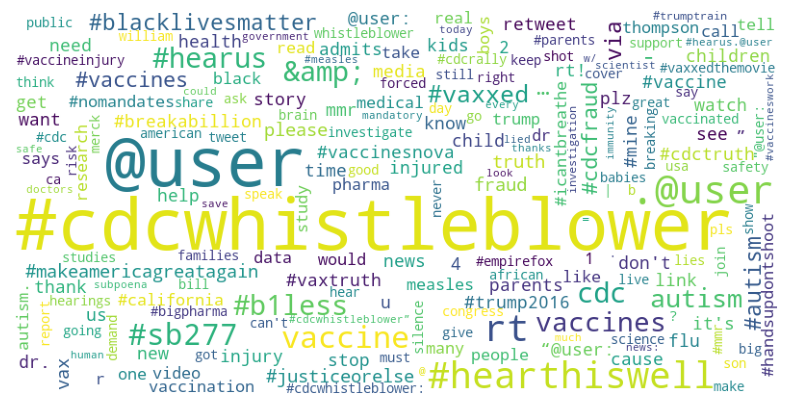

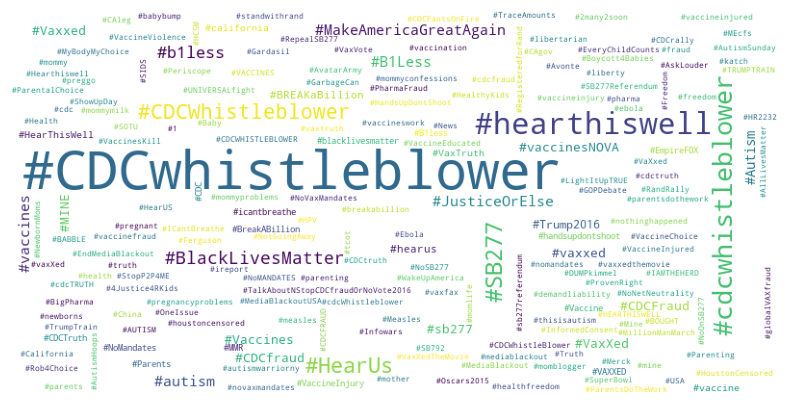

In [9]:
## Dictionizing the token series from above and visualizing as wordcloud
token_counts_dict={i:value for i,value in token_counts.items()}
token_cloud=WordCloud(width=800,height=400,background_color="white").generate_from_frequencies(token_counts_dict)
plt.figure(figsize=(10,5))
plt.imshow(token_cloud)
plt.axis("off")

## Dictionizing the hashtags series from above and visualizing as wordcloud
hashtag_counts_dict={i:value for i,value in hashtag_counts.items()}
hashtag_cloud=WordCloud(width=800,height=400,background_color="white").generate_from_frequencies(hashtag_counts_dict)
plt.figure(figsize=(10,5))
plt.imshow(hashtag_cloud)
plt.axis("off")
plt.show()

***
# Part 3 - Application

Using the [Tkinter](https://docs.python.org/3/library/tkinter.html) library write the code for an application. This application is supposed to aid you in labelling texts according to their sentiment. For this you will need to implement certain functions into your app. Once your application is up an running sample 150 tweets from the CDCWhistleblower data set and label them using your app.<br>
Save your sample as .json file and be sure to include the tweet_id for each tweet so you are able to compare your labels with the ones you get from running VADER in task 4.<br>
Please use the original text for your labeling. After the preprocessing in task 2 it should not contain specific user mentions but only '@user', there should be no URLs left in the text, and #Hashtags should appear untouched in your texts.<br>

***Hint: Before you actually start coding, a great approach is to first of all start by conceptualizing your small app. Think about which functionalities you need to have and how these depend on and call each other. You can, as an example, refer to the extended Tkinter example we covered in the tutorial.***
If you like to, you can hand in your handwritten schema.

![Picture_of_schema](path_to_the_pic/pic.jpg) <-- **double click this cell to see how appending pictures with .ipynb files works. Make sure to hand in the png as well.**

## Task 3.1


In order for your application to work as intended follow the steps below. Note that this is no easy task! Work with other students, exchange ideas, or find help online but remember to only hand in code that you have written yourself!<br>

Implement the application as a class:<br>
- that takes 2 arguments: 'input_file' and 'output_file'
- that supports the method `load_data()` which loads the output_file and the input_file and removes tweets that are already classified aka. part of the output file. This is to ensure that you won't label the same text twice and that you will reach an end, once every text got labeled once. 
- with method `start_app()` that runs your application with a text box showing the content (text) of a tweet and 4 labeling buttons (Positive, Negative, Neutral, Undecidable) used to classify the content of each tweet
- with method `next_text()` that chooses a random tweet from the input data, displays it in the text box of the app and once the tweet has been classified, removes it from the pool of tweets still to be labeled<br>

Feel free to implement any other methods you deem necessary and do not forget to comment and explain your code!<br>

***Hint: There are many ways of solving this task! There is no 'one and only' solution so be bold and experiment with your ideas. You can probably make most of them work!***

In [11]:
# Your code

class label_text:
    """
    Class label_text:
        A Class to label tweet sentiments by hand.
    
    Attributes
    ----------
    input_file_name: strintg
        The name of a json-file of tweets to label according to their sentiments. 
        To distinguish it from the class internal 'input_file' that is later loaded using this string, it is called input_file_name.

    output_file_name: json
        The name of the output json-file.
        Again, to distinguish it from the final 'output_file' with labeled tweets, it is called output_file_name.
    
    title: string
        Title of the Tk-window
    
    geometry: string
        Size dimensions of the Tk-window

    Methods
    -------
    __init__:
        Takes the name/path of the input_ and output_file, takes the geometry, and the title of the Tk-window (sets a default for both).
    load_data:
        Reads the json datafile with unlabeled as a pandas Dataframe using its previously initialized name.
        Selects a random sample of 150 tweets from this file.
        Checks if an output file with the given name already exists. If yes, it is loaded as a Dataframe as well.
        If not, an empty Dataframe is initialized.
        A working_file is assigned. This is a subset of the input_file and constitues of all rows that are not found in the output file to avoid duplications from previous labeling sessions.
    abort: 
        A method that will be called if the Tk-window is closed.
        It saves the output_file.
    next_text:
        The user interface for labeling tweet. The get_started_button is removed and a random tweet text from our working file is portrayed.
        The header label asks the user for the sentiment of the tweet. The portrayed tweet is dropped from the working_file. 
    start_app:
        Initializes and starts the Tk-window/the app, calls the load_data method to load the datafiles required. 
        For the first step, the tweet header is empty and only the header label is portrayed, asking the user to press the 'Get started Button' to start the labeling process.
        The get_started_button is initialized and portrayed. If it is pressed, the labeling method is called. 
        However, if the working_file is found to be empty from the onset, the button is immidiately destroyed and the header label informs the user that all tweets have already been labeled. 
        Before initializing the mainloop, the window protocol for the case that it is closed is specified, i.e. calling the abort method.
    labeling:
        Creates a frame of four buttons (positive, neural, negative and undecidable) and calls a tweet text using the next_text method.
        If one of the four is clicked a sentiment label is assigned to the sentiment column of the respective tweet in the output file.
        An if loop checks if the working_file is empty. If so, all four buttons are destroyed and the header label informs the user that all tweets have been labeld.
        If not, it proceeds with the next_text.
        
    """


    def __init__(self, input_file_name, output_file_name, geometry='700x400',title="Labeling Tweets"):
        self.title = title
        self.geometry = geometry
        self.input_file_name = input_file_name
        self.output_file_name=output_file_name

    def load_data(self):
        
        self.input_file = pd.read_json(self.input_file_name)
        self.input_file=self.input_file.sample(n=150, random_state=123)

        if os.path.exists(self.output_file_name):
            self.output_file = pd.read_json(self.output_file_name)
        else:
            self.output_file = pd.DataFrame(columns=self.input_file.columns)
        
        self.working_file=self.input_file[~self.input_file["id"].isin(self.output_file["id"])]
    
                
    def abort(self):
        self.output_file.to_json(self.output_file_name)
        self.window.destroy()   

    def next_text(self):

        self.get_started_button.destroy()

        self.random_row = self.working_file.sample(n=1).iloc[0]

        self.tweet_text = self.random_row['text']
        self.tweet.config(text = f'{self.tweet_text}')
        self.label.config(text='What is the sentiment of this tweet?')
        self.working_file=self.working_file.drop(self.random_row.name)


    def start_app(self):

        self.window = tk.Tk()
        self.window.title(self.title)
        self.window.geometry(self.geometry)
        self.window.resizable(True, True)

        self.load_data()


        self.tweet = tk.Label(self.window, text = '', wraplength=700, anchor= 'center')
        self.tweet.pack(side=tk.TOP, pady=10)

        self.label = tk.Label(self.window, text='Press the "Get Started Button" to assign sentiments to tweets.')
        self.label.pack(side=tk.TOP, pady=10)
        

        self.get_started_button = tk.Button(self.window, text='Get Started', command=self.labeling)
        self.get_started_button.pack()

        if len(self.working_file)==0:
            self.label.config(text="All tweets have already been labeled.\n You may close the app.")
            self.get_started_button.destroy()
        
        self.window.protocol("WM_DELETE_WINDOW",self.abort)
        self.window.mainloop()
        


    def labeling(self):

        self.get_started_button.destroy()

        
        button_frame = tk.Frame(self.window)
        button_frame.pack(side=tk.TOP, pady=10)  # pady includes a space of 10 screenunits around the element in the y axis

        def callback(label):

            self.output_file.loc[len(self.output_file)]=self.random_row
            self.output_file.loc[len(self.output_file)-1,"label"]=label
            

            if len(self.working_file) == 0:
                self.label.config(text="All tweets have been labeled! You may close the app.")
                self.output_file.to_json(self.output_file_name)
                positive.destroy()
                neutral.destroy()
                negative.destroy()
                undecidable.destroy()
            else:
                self.next_text()
        

        positive = tk.Button(button_frame, text='Positive', command=lambda: callback('Positive'))
        neutral = tk.Button(button_frame, text='Neutral', command=lambda: callback('Neutral'))
        negative = tk.Button(button_frame, text='Negative', command=lambda: callback('Negative'))
        undecidable = tk.Button(button_frame, text='Undecidable', command=lambda: callback('Undecidable'))

        positive.pack(side=tk.LEFT, padx=5)
        neutral.pack(side=tk.LEFT, padx=5)
        negative.pack(side=tk.LEFT, padx=5)
        undecidable.pack(side=tk.LEFT, padx=5)

        self.next_text()


## Task 3.2


Use your application to classify your sample of 150 tweets from the CDCWhisleblower data and save your result as 'manually_labeled_tweets.json'.<br>
Make sure you upload this labeled sample of tweets to your solutions repository!

In [12]:
# Your code

## Labeling the tweets by hand using the defined class and its methods
label_text("processed_tweets.json", "manually_labeled_tweets.json").start_app()

***
# Part 4 - Sentiment Analysis

In this last part of the assignment you will use the VADER sentiment analyzer to, well, analyze the sentiment of the CDCWhistleblower tweets.<br>
You can find a tutorial of how the nltk module's VADER analyzer works [here](https://www.nltk.org/howto/sentiment.html).<br>

## Task 4.1


Use the sentiment analyzer on the preprocessed original text column (the one without URLs, with @user, and #Hashtags) and save the resulting polarity score to a new column.

In [13]:
# Your code

## Reopening the json-file with the processed tweets
with open("processed_tweets.json", "r") as read_file:
    cdc= json.load(read_file)


def sentiment_score(tweets):
    """
    A function that applies the Vader Sentiment Intensity Analyzer on tweet texts in a tweets json-file

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Applies the Vader Sentiment Intensity Analyzer on tweet texts in a tweets json-file and extracts the compound polarity scores to be assigned to a new 'polarity score' key 

    Return
    ------
    Result: A new key of sentiment polarity scores for each tweet
    """
    classifier = SentimentIntensityAnalyzer()
    for tweet in tweets:
        tweet["polarity_score"]=classifier.polarity_scores(tweet["text"])["compound"]

## Applying the function
sentiment_score(cdc)

## Task 4.2


Create another column containing the VADER sentiment label for each tweet. You can get the label (positive, negative, neutral) by checking the polarity scores you got in task 4.1. If the polarity score is smaller 0 (<0) the label should be 'negative', if it is larger 0 (>0) the label should be 'positive', and otherwise the label should be 'neutral'.<br>
What are the shares of 'positive', 'negative', and 'neutral' tweets? Visualize your findings.

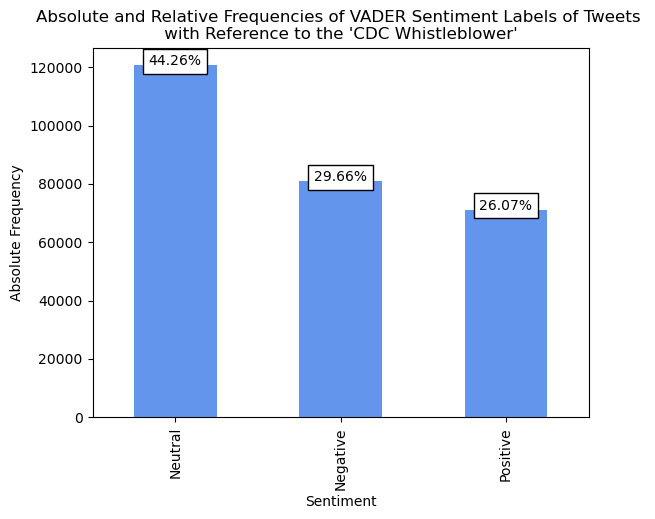

In [14]:
# Your code

def sentiment_labels(tweets):
    """
    A function that assigns positive/neutral/negative sentiment labels based on the compound score. 

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Assigns Postivie/Negative/Neutral Labels to the tweeets based on the compound score previously assigned

    Return
    ------
    Result: A new key of sentiment labels for each tweet
    """
    for tweet in tweets:
        if tweet["polarity_score"]>0:
            tweet["sentiment"]="Positive"
        elif tweet["polarity_score"]<0:
            tweet["sentiment"]="Negative"
        else:
            tweet["sentiment"]="Neutral"

## Applying the function
sentiment_labels(cdc)


def visualize_labels(tweets):

    """
    A function that visualizes the sentiment shares in the tweets file

    Input
    -----
    tweets: list
        A list of tweet-dictonaries (i.e. a dictonary of information for each tweet.)
    
    Body
    ----
    Loads the tweets json file as a pandas dataframe and extracts a pandas series of all sentiment counts.

    bar_labels(label_counts)
        A quick function to label the bars according to the sentiment shares. 
        To do this I used some online resources found under: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
    
    Plot the figure
    Return
    ------
    Result: A bar plot showing the absolute and relative frequencies of the tweet sentiments
    """
    tweets_pd=pd.DataFrame.from_dict(tweets)
    sentiment_counts=tweets_pd["sentiment"].value_counts()
    
    def bar_labels(label_counts):
        label=list(label_counts.keys())
        freq=list(label_counts.values)
        for i in range(len(label)):
            plt.text(i, freq[i],f"{round((freq[i]/sum(freq)*100),2)}%", ha="center", 
                     bbox=dict(facecolor="white"))

    plt.figure()
    sentiment_counts.plot(kind="bar", color="cornflowerblue")
    bar_labels(sentiment_counts)
    plt.title("Absolute and Relative Frequencies of VADER Sentiment Labels of Tweets \n with Reference to the 'CDC Whistleblower' ")
    plt.xlabel("Sentiment")
    plt.ylabel("Absolute Frequency")
    plt.show()

#ä Applying the function
visualize_labels(cdc)

## Task 4.3



Match the 150 tweets you labeled manually with the labels you got from applying the VADER sentiment analyzer to the data. Visualize how VADER performed at analyzing the sentiment against your manual classifications of these 150 tweets.

In [15]:
# Your code
## Reading both the vader and manually labeled files and merging them into a pandas dataframe
## Removing the tweets labled as undecidable
vader_label_pd=pd.DataFrame.from_dict(cdc)
manual_label_pd=pd.read_json("manually_labeled_tweets.json")

sentiment=pd.merge(left=manual_label_pd, right=vader_label_pd,how="left", on="id")[["id","label", "sentiment"]]
sentiment=sentiment.loc[sentiment["label"]!="Undecidable"]


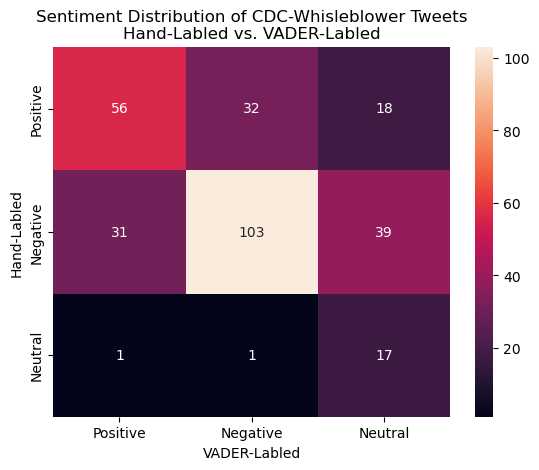

In [16]:
## Creating a heatmap of the sentiment labeling
plt.figure()
sns.heatmap(confusion_matrix(y_pred=sentiment["sentiment"], y_true=sentiment["label"]), 
            yticklabels=set(sentiment["label"]), 
            xticklabels=set(sentiment["sentiment"]),
            annot=True,
            fmt="d")
plt.ylabel("Hand-Labled")
plt.xlabel("VADER-Labled")
plt.title("Sentiment Distribution of CDC-Whisleblower Tweets\nHand-Labled vs. VADER-Labled")
plt.show()
